In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('C:/Users/민지/Downloads/titanic.csv', index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [2]:
data.isna().sum() #결측치 확인

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [3]:
data.drop('Cabin', axis=1, inplace=True) #결측치값이 많은 Cabin 삭제
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [4]:
data['Age'].fillna(data['Age'].mean(), inplace=True) #Age의 결측치를 평균값으로 채우기
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [5]:
data['Embarked'].value_counts(dropna=False) #Embarked 값 확인

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [6]:
data['Embarked'].fillna('S', inplace=True) #제일 많은 값으로 결측치 채우기
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [7]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [8]:
#Survived를 타겟으로 삼아 EDA 수행

Text(0.5, 1.0, 'Pclass')

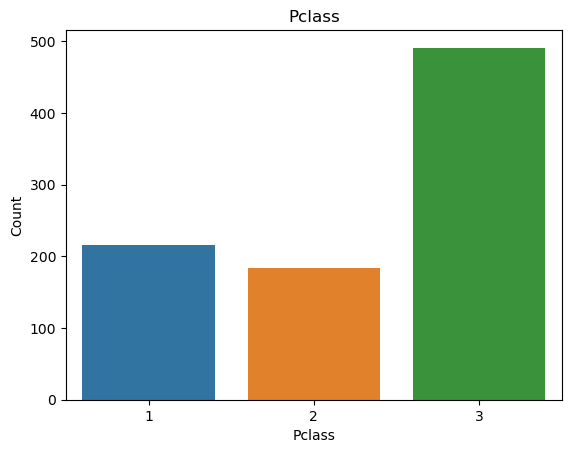

In [9]:
#Pclass 레이블별 갯수 및 차트표시
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass')

Text(0.5, 1.0, 'Survived')

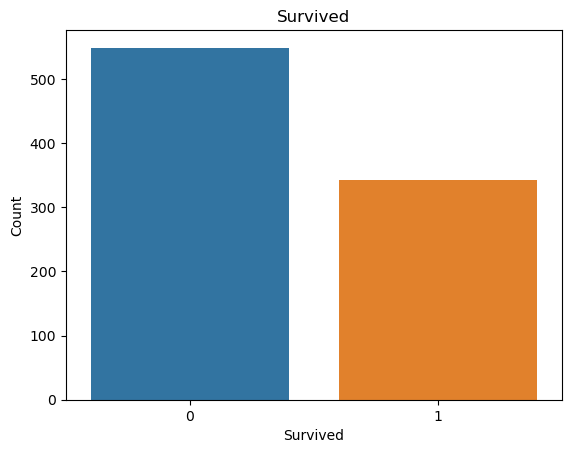

In [10]:
#생존자와 사망자 총 숫자 및 차트 표시
sns.countplot(data=data, x='Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived')

In [11]:
data['Survived'].value_counts() #1이 생존자

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

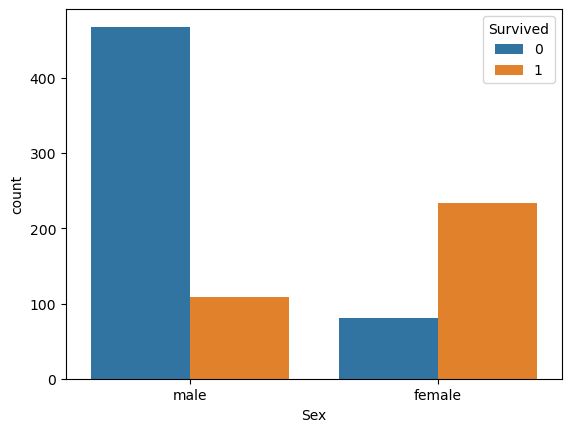

In [12]:
#Sex, Pclass, Survived 상관관계 분석
sns.countplot(x='Sex', hue='Survived', data=data)

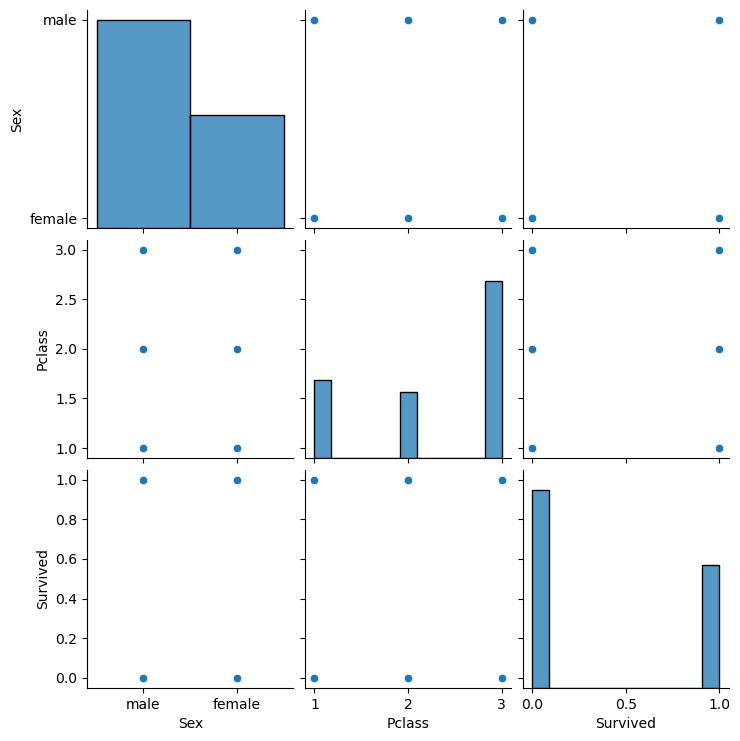

In [13]:
sns.pairplot(data, vars=['Sex', 'Pclass', 'Survived'])

In [25]:
#X_train, X_test, y_train, y_test로 나누고 생존여부에 따라 각각 분류
X=data.drop(['Survived', 'Sex', 'Name', 'Ticket', 'Embarked'], axis=1)
y=data['Survived']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [27]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf_svm = SVC(random_state=0)   #SVM
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

--- SVM Classifier ---
0.7206703910614525
[[104   6]
 [ 44  25]]


In [34]:
clf_lr = LogisticRegression(random_state=0)  #LogisticRegression
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

--- Logistic Regression Classifier ---
0.7374301675977654
[[97 13]
 [34 35]]


In [35]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

--- Decision Tree Classifier ---
0.6256983240223464
[[83 27]
 [40 29]]


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

--- Random Forest ---
0.7206703910614525
[[88 22]
 [28 41]]


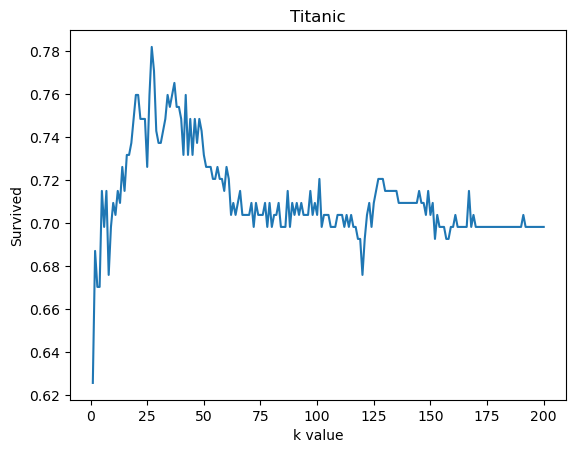

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_range = range(1, 201)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Survived")
plt.title("Titanic")
plt.show()